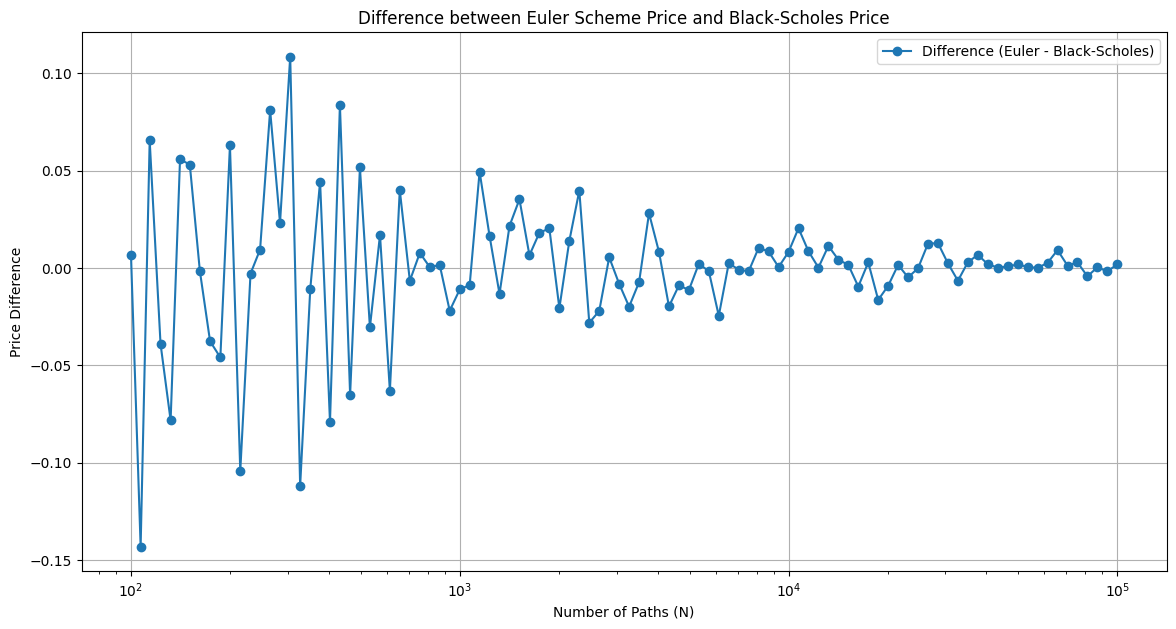

In [1]:
# Monte-Carlo Option Pricing Simulation Exercise
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
S0 = 5      # Initial stock price
K = S0      # Strike price (ATM option)
sigma = 0.3 # Volatility
r = 0.06    # Risk-free rate
T = 1.0     # Time to maturity
m = 1000    # Number of time steps
dt = T / m  # Time step size

# Generate a range of N values
N_values = np.logspace(2, 5, num=100, dtype=int)  # 100 points from 10^2 to 10^5

# Black-Scholes analytical price for European call option
def black_scholes_call(S0, K, T, r, sigma):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

bs_call_price = black_scholes_call(S0, K, T, r, sigma)

# Monte Carlo simulation using Euler scheme for European call option
def monte_carlo_euler(S0, K, T, r, sigma, N, m):
    dt = T / m
    S_paths = np.zeros((m + 1, N))
    S_paths[0] = S0

    for t in range(1, m + 1):
        Z = np.random.standard_normal(N)
        S_paths[t] = S_paths[t - 1] * (1 + r * dt + sigma * np.sqrt(dt) * Z)

    # Payoff for European call option
    payoffs = np.maximum(S_paths[-1] - K, 0)
    price = np.exp(-r * T) * np.mean(payoffs)
    return price

# Compute the differences for different N values
euler_differences = []

for N in N_values:
    euler_price = monte_carlo_euler(S0, K, T, r, sigma, N, m)
    difference = euler_price - bs_call_price
    euler_differences.append(difference)

# Plot results: Difference between Euler scheme price and Black-Scholes price
plt.figure(figsize=(14, 7))
plt.plot(N_values, euler_differences, marker='o', linestyle='-', label='Difference (Euler - Black-Scholes)')
plt.xlabel('Number of Paths (N)')
plt.ylabel('Price Difference')
plt.title('Difference between Euler Scheme Price and Black-Scholes Price')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.show()

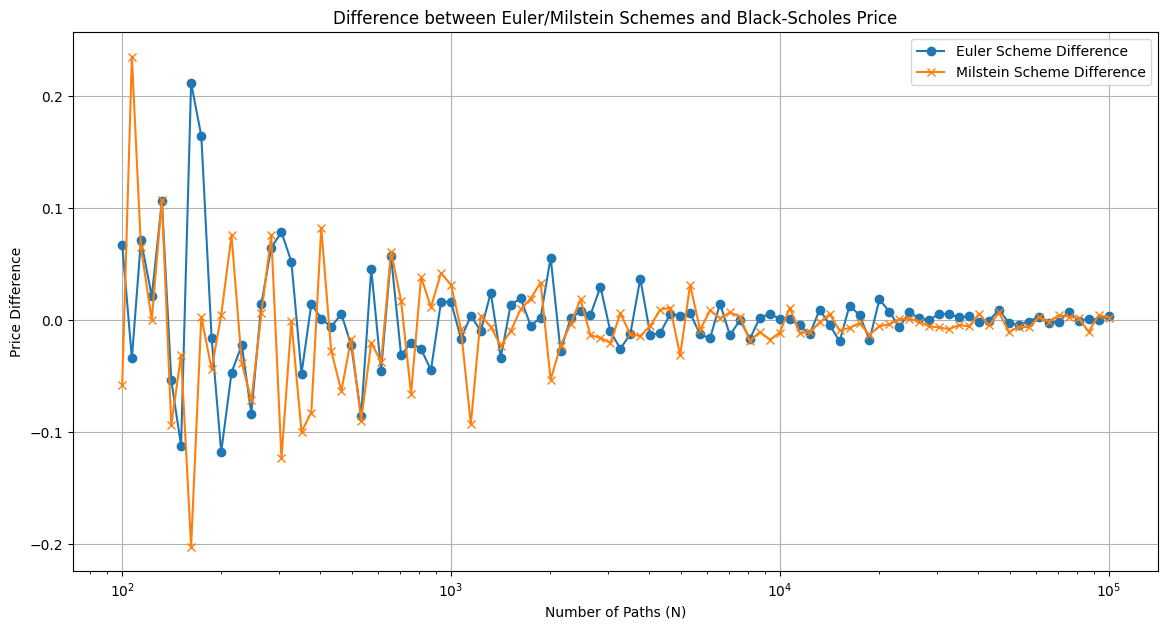

In [3]:
# Comparison between price difference generated by both the Euler and Milstein schemes from those given by the analytic Black-Scholes formula

# Compute prices and differences for different N values
euler_call_prices = []
milstein_call_prices = []
euler_differences = []
milstein_differences = []

for N in N_values:
    euler_price = monte_carlo_euler(S0, K, T, r, sigma, N, m)
    milstein_price = monte_carlo_milstein(S0, K, T, r, sigma, N, m)
    euler_call_prices.append(euler_price)
    milstein_call_prices.append(milstein_price)
    
    # Calculate differences from the Black-Scholes price
    euler_diff = euler_price - bs_call_price
    milstein_diff = milstein_price - bs_call_price
    euler_differences.append(euler_diff)
    milstein_differences.append(milstein_diff)
    
  

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(N_values, euler_differences, label='Euler Scheme Difference', marker='o')
plt.plot(N_values, milstein_differences, label='Milstein Scheme Difference', marker='x')
plt.xlabel('Number of Paths (N)')
plt.ylabel('Price Difference')
plt.title('Difference between Euler/Milstein Schemes and Black-Scholes Price')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

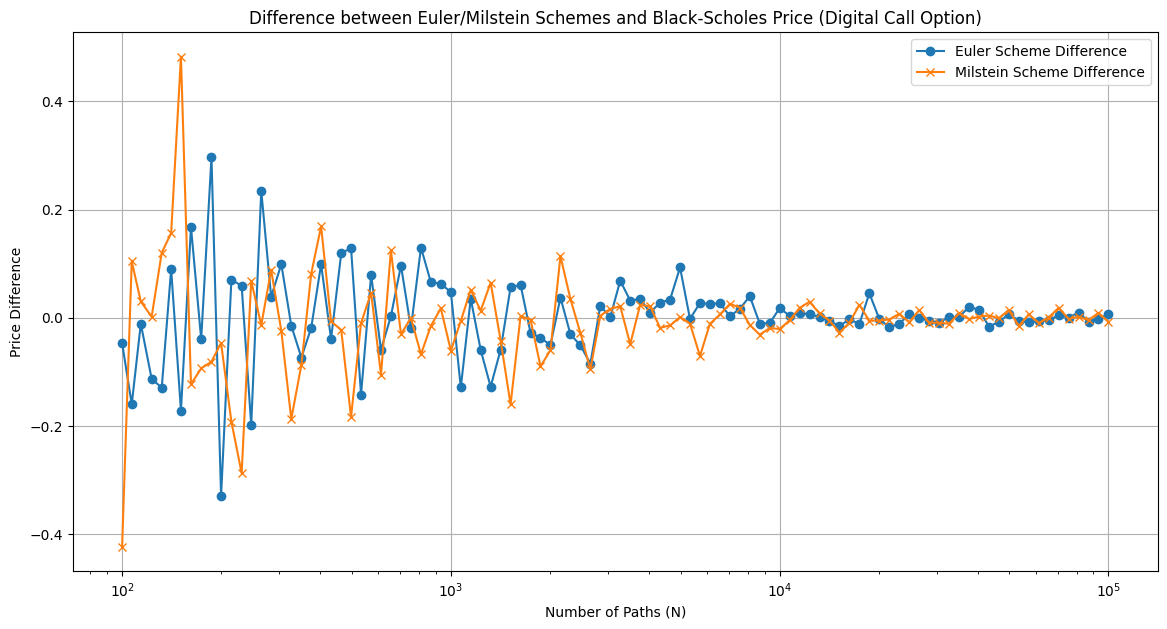

In [4]:
# Comparison between price difference generated by both the Euler and Milstein schemes from those given by the analytic Black-Scholes formula for a digital call option

# Black-Scholes analytical price for digital call option
def black_scholes_digital_call(S0, K, T, r, sigma):
    d2 = (np.log(S0 / K) + (r - 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    digital_call_price = K * np.exp(-r * T) * norm.cdf(d2)
    return digital_call_price

bs_digital_price = black_scholes_digital_call(S0, K, T, r, sigma)

# Monte Carlo simulation using Euler scheme for digital call option
def monte_carlo_euler_digital(S0, K, T, r, sigma, N, m):
    dt = T / m
    S_paths = np.zeros((m + 1, N))
    S_paths[0] = S0

    for t in range(1, m + 1):
        Z = np.random.standard_normal(N)
        S_paths[t] = S_paths[t - 1] * (1 + r * dt + sigma * np.sqrt(dt) * Z)

    # Payoff for digital call option
    payoffs = (S_paths[-1] > K).astype(float) * K
    price = np.exp(-r * T) * np.mean(payoffs)
    return price

# Monte Carlo simulation using Milstein scheme for digital call option
def monte_carlo_milstein_digital(S0, K, T, r, sigma, N, m):
    dt = T / m
    S_paths = np.zeros((m + 1, N))
    S_paths[0] = S0

    for t in range(1, m + 1):
        Z = np.random.standard_normal(N)
        S_paths[t] = S_paths[t - 1] * (1 + r * dt + sigma * np.sqrt(dt) * Z + 0.5 * sigma**2 * dt * (Z**2 - 1))

    # Payoff for digital call option
    payoffs = (S_paths[-1] > K).astype(float) * K
    price = np.exp(-r * T) * np.mean(payoffs)
    return price

# Compute prices and differences for different N values
euler_digital_prices = []
milstein_digital_prices = []
euler_differences = []
milstein_differences = []

for N in N_values:
    euler_price = monte_carlo_euler_digital(S0, K, T, r, sigma, N, m)
    milstein_price = monte_carlo_milstein_digital(S0, K, T, r, sigma, N, m)
    euler_digital_prices.append(euler_price)
    milstein_digital_prices.append(milstein_price)
    
    # Calculate differences from the Black-Scholes price
    euler_diff = euler_price - bs_digital_price
    milstein_diff = milstein_price - bs_digital_price
    euler_differences.append(euler_diff)
    milstein_differences.append(milstein_diff)
 

# Plot results for digital call option
plt.figure(figsize=(14, 7))
plt.plot(N_values, euler_differences, label='Euler Scheme Difference', marker='o')
plt.plot(N_values, milstein_differences, label='Milstein Scheme Difference', marker='x')
plt.xlabel('Number of Paths (N)')
plt.ylabel('Price Difference')
plt.title('Difference between Euler/Milstein Schemes and Black-Scholes Price (Digital Call Option)')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()